In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
filename = 'Data.xls'
df = pd.read_excel(filename) 
df.head(15)

,Nintendo Switch Platform,Metric,3/2017,3/2018,3/2019,3/2020
0,Nintendo Switch hardware/Japan,ten thousand units (hardware),60,378,385,521
1,Nintendo Switch hardware/The Americas,ten thousand units (hardware),120,594,688,811
2,Nintendo Switch hardware/Europe,ten thousand units (hardware),76,379,455,534
3,Nintendo Switch hardware/Other,ten thousand units (hardware),18,154,169,237
4,Nintendo Switch software/Japan,ten thousand units (software),89,1226,2148,3256
5,Nintendo Switch software/The Americas,ten thousand units (software),286,2752,5394,7428
6,Nintendo Switch software/Europe,ten thousand units (software),142,1917,3516,5017
7,Nintendo Switch software/Other,ten thousand units (software),29,456,797,1171


In [105]:
df['Total'] = df['3/2017'] + df['3/2018'] + df['3/2019'] + df['3/2020']
df.head()

,Nintendo Switch Platform,Metric,3/2017,3/2018,3/2019,3/2020,Total
0,Nintendo Switch hardware/Japan,ten thousand units (hardware),60,378,385,521,1344
1,Nintendo Switch hardware/The Americas,ten thousand units (hardware),120,594,688,811,2213
2,Nintendo Switch hardware/Europe,ten thousand units (hardware),76,379,455,534,1444
3,Nintendo Switch hardware/Other,ten thousand units (hardware),18,154,169,237,578
4,Nintendo Switch software/Japan,ten thousand units (software),89,1226,2148,3256,6719


In [106]:
df_hardware = df.loc[df['Nintendo Switch Platform'].str.contains('hardware'),:]
df_hardware

,Nintendo Switch Platform,Metric,3/2017,3/2018,3/2019,3/2020,Total
0,Nintendo Switch hardware/Japan,ten thousand units (hardware),60,378,385,521,1344
1,Nintendo Switch hardware/The Americas,ten thousand units (hardware),120,594,688,811,2213
2,Nintendo Switch hardware/Europe,ten thousand units (hardware),76,379,455,534,1444
3,Nintendo Switch hardware/Other,ten thousand units (hardware),18,154,169,237,578


In [107]:
df_software = df.loc[df['Nintendo Switch Platform'].str.contains('software'),:]
df_software

,Nintendo Switch Platform,Metric,3/2017,3/2018,3/2019,3/2020,Total
4,Nintendo Switch software/Japan,ten thousand units (software),89,1226,2148,3256,6719
5,Nintendo Switch software/The Americas,ten thousand units (software),286,2752,5394,7428,15860
6,Nintendo Switch software/Europe,ten thousand units (software),142,1917,3516,5017,10592
7,Nintendo Switch software/Other,ten thousand units (software),29,456,797,1171,2453


In [108]:
df_hardware.loc[0,'Nintendo Switch Platform'] = 'Japan'
df_hardware.loc[1,'Nintendo Switch Platform'] = 'The Americas'
df_hardware.loc[2,'Nintendo Switch Platform'] = 'Europe'
df_hardware.loc[3,'Nintendo Switch Platform'] = 'Other'
df_hardware

,Nintendo Switch Platform,Metric,3/2017,3/2018,3/2019,3/2020,Total
0,Japan,ten thousand units (hardware),60,378,385,521,1344
1,The Americas,ten thousand units (hardware),120,594,688,811,2213
2,Europe,ten thousand units (hardware),76,379,455,534,1444
3,Other,ten thousand units (hardware),18,154,169,237,578


In [109]:
df_software.loc[4,'Nintendo Switch Platform'] = 'Japan'
df_software.loc[5,'Nintendo Switch Platform'] = 'The Americas'
df_software.loc[6,'Nintendo Switch Platform'] = 'Europe'
df_software.loc[7,'Nintendo Switch Platform'] = 'Other'
df_software

,Nintendo Switch Platform,Metric,3/2017,3/2018,3/2019,3/2020,Total
4,Japan,ten thousand units (software),89,1226,2148,3256,6719
5,The Americas,ten thousand units (software),286,2752,5394,7428,15860
6,Europe,ten thousand units (software),142,1917,3516,5017,10592
7,Other,ten thousand units (software),29,456,797,1171,2453


In [110]:
total_software = df_software.groupby('Nintendo Switch Platform')['Total'].sum()
total_software

Nintendo Switch Platform
Europe          10592
Japan            6719
Other            2453
The Americas    15860
Name: Total, dtype: int64

C:\Users\fabia\AppData\Local\Temp\ipykernel_16232\2925916979.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


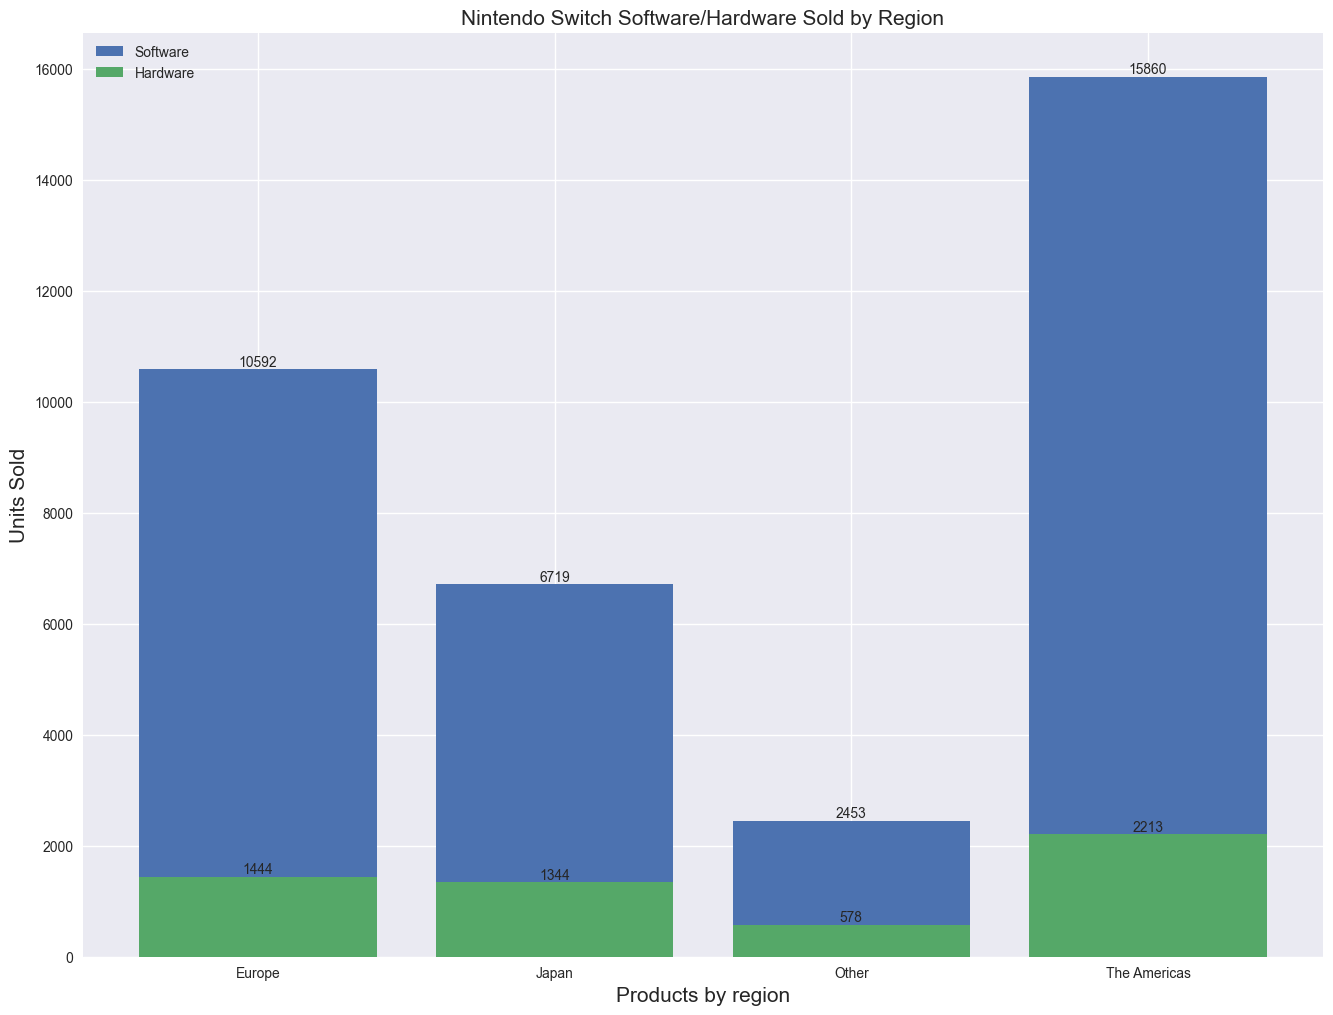

In [111]:
total_software = df_software.groupby('Nintendo Switch Platform')['Total'].sum()
total_hardware = df_hardware.groupby('Nintendo Switch Platform')['Total'].sum()

fig = plt.figure(dpi = 100,figsize=(16,12))
plt.style.use('seaborn')


plt.bar(total_software.index,total_software.values,label='Software')
plt.bar(total_hardware.index,total_hardware.values,label='Hardware')

plt.title('Nintendo Switch Software/Hardware Sold by Region',fontsize = 15)
plt.xlabel('Products by region',fontsize=15)
plt.ylabel('Units Sold',fontsize=15)

for i, v in enumerate(total_software.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

for i, v in enumerate(total_hardware.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.legend()

plt.show()

Se puede apreciar que, Las Américas lideran la venta tanto en software como en hardware. Esto puede ser debido a que se reconoce como "Las Américas" a todos los paises presentes en América del Sur, del Centro y del Norte, los cuales en su totalidad tienen más habitantes que, por ejemplo, los paises en total de Europa.

Lo que llama la atención es que en cuanto a hardware, Japón tiene casi la misma cantidad de ventas que todo Europa, lo que representa que estadísticamente hay más hardware de Nintendo Switch en Japón que en toda Europa, per cápita. 